# Tutorial 4, Question 1

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

## Set the parameters

In [2]:
num_epochs = 1500
lr = 0.05

num_features = 2
num_classes = 3
num_data = 18

## Prepare input data

In [3]:
X = np.array([[0, 4],[-1, 3],[2, 3], [-2, 2],[0, 2], [1, 2],
              [-1, 2],[-3, 1],[-1, 1],[2, 1],[4, 1],[-2, 0],
             [1, 0],[3, 0],[-3, -1],[-2, -1],[2, -1],[4, -1]]).astype(float)
            
Y = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2]).astype(int)
K = np.zeros((num_data, num_classes)).astype(float)
for p in range(len(Y)):
    K[p,Y[p]] = 1

## Plot input data

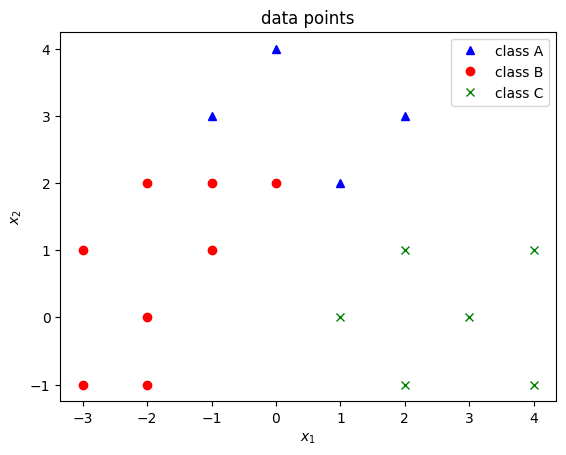

In [4]:
plt.figure(1)
plot_pred = plt.plot(X[Y==0,0], X[Y==0,1], 'b^', label='class A')
plot_original = plt.plot(X[Y==1,0], X[Y==1,1], 'ro', label='class B')
plot_original = plt.plot(X[Y==2,0], X[Y==2,1], 'gx', label='class C')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('data points')
plt.legend()

In [5]:
w_init = [[0.88, 0.08, -0.34],
          [0.68, -0.39, -0.19]]
b_init = [0.0, 0.0, 0.0]

In [6]:
class Softmax_Layer():
  def __init__(self, no_features, no_labels):
    self.w = torch.tensor(w_init, dtype=torch.double)
    self.b = torch.tensor(b_init, dtype=torch.double)

  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    p = torch.exp(u)/torch.sum(torch.exp(u), dim=1, keepdims=True)
    y = torch.argmax(p, dim=1)
    return u, p, y

In [7]:
def loss_fn(p, k, y):
    entropy = -torch.sum(torch.log(p)*k)
    error = torch.sum(torch.not_equal(torch.argmax(k, dim=1), y))
    return entropy, error

In [8]:
def train(model, inputs, k, learning_rate):
    _, p, y = model(inputs)
    grad_u = -(k - p)
    grad_w = torch.matmul(torch.transpose(torch.tensor(inputs), 0, 1), grad_u)
    grad_b = torch.sum(grad_u, dim = 0) 
    
    model.w -= learning_rate * grad_w
    model.b -= learning_rate * grad_b
    
    return grad_u, grad_w, grad_b

## Initialize the softmax layer

In [9]:
model = Softmax_Layer(num_features, num_classes)

print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [[ 0.88  0.08 -0.34]
 [ 0.68 -0.39 -0.19]], b: [0. 0. 0.]


## Train the softmax layer

In [10]:
loss_, err_ = [], []
for epoch in range(num_epochs):
    u_, p_, y_ = model(X)
    l_, e_ = loss_fn(p_, torch.tensor(K), y_)
    grad_u_, grad_w_, grad_b_ = train(model, X, torch.tensor(K), lr)
    
    if (epoch == 0):
        print('epoch: {}'.format(epoch+1))
        print('u: {}'.format(u_.numpy()))
        print('p: {}'.format(p_.numpy()))
        print('y: {}'.format(y_.numpy()))
        print('entropy: {}'.format(l_.numpy()))
        print('error: {}'.format(e_.numpy()))
        print('grad_u: {}'.format(grad_u_.numpy()))
        print('grad_w: {}'.format(grad_w_.numpy()))
        print('grad_b: {}'.format(grad_b_.numpy()))

        print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
  
    loss_.append(l_.numpy()), err_.append(e_.numpy())

    if epoch%100 == 99:
        print('epoch:{}, loss:{}, error:{}'.format(epoch+1,loss_[epoch], err_[epoch]))

epoch: 1
u: [[ 2.72 -1.56 -0.76]
 [ 1.16 -1.25 -0.23]
 [ 3.8  -1.01 -1.25]
 [-0.4  -0.94  0.3 ]
 [ 1.36 -0.78 -0.38]
 [ 2.24 -0.7  -0.72]
 [ 0.48 -0.86 -0.04]
 [-1.96 -0.63  0.83]
 [-0.2  -0.47  0.15]
 [ 2.44 -0.23 -0.87]
 [ 4.2  -0.07 -1.55]
 [-1.76 -0.16  0.68]
 [ 0.88  0.08 -0.34]
 [ 2.64  0.24 -1.02]
 [-3.32  0.15  1.21]
 [-2.44  0.23  0.87]
 [ 1.08  0.55 -0.49]
 [ 2.84  0.71 -1.17]]
p: [[0.95725834 0.013251   0.02949065]
 [0.74688701 0.06708188 0.18603111]
 [0.98565168 0.00803095 0.00631737]
 [0.27804803 0.162032   0.55991997]
 [0.7732904  0.09098136 0.13572824]
 [0.90523572 0.04785595 0.04690833]
 [0.53868681 0.14105281 0.32026038]
 [0.04747873 0.17951914 0.77300213]
 [0.31422361 0.23987186 0.44590453]
 [0.90434851 0.06262815 0.03302335]
 [0.98312509 0.01374584 0.00312907]
 [0.05738527 0.28423113 0.6583836 ]
 [0.57321072 0.25756018 0.1692291 ]
 [0.89569581 0.08125569 0.0230485 ]
 [0.00794311 0.25526562 0.73679127]
 [0.02335079 0.33718476 0.63946445]
 [0.55659139 0.32761246 0.1157

## Display parameters at convergence

In [11]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('p: {}'.format(p_.numpy()))
print('y: {}'.format(y_.numpy()))
print('entropy: {}'.format(l_.item()))
print('error: {}'.format(e_.item()))
print('loss:{}, error:{}'.format(loss_[-1], err_[-1]))

w: [[-0.15320849 -3.40661893  4.17982742]
 [ 5.2708133  -1.02061255 -4.15020075]], b: [-7.82371996  5.8055438   2.01817615]
p: [[9.99990202e-01 9.79770417e-06 8.14126679e-13]
 [8.79859236e-01 1.20140764e-01 1.15917087e-10]
 [9.99933988e-01 7.89734937e-06 5.81149737e-05]
 [5.25225772e-04 9.99474774e-01 1.11974288e-11]
 [2.59996378e-01 7.39971500e-01 3.21214063e-05]
 [8.93278025e-01 9.83207737e-02 8.40120121e-03]
 [1.34060759e-02 9.86593902e-01 2.17571218e-08]
 [3.77073106e-08 9.99999962e-01 1.30087588e-13]
 [2.52111422e-05 9.99974285e-01 5.04031633e-07]
 [1.13341797e-04 2.60027470e-04 9.99626631e-01]
 [1.95657859e-08 6.71348961e-11 9.99999980e-01]
 [1.80906874e-09 9.99999992e-01 5.85272829e-09]
 [6.85318021e-07 2.19113889e-02 9.78087926e-01]
 [1.20909182e-10 5.78174485e-09 9.99999994e-01]
 [1.29809494e-13 1.00000000e+00 6.79591237e-11]
 [3.35656805e-12 9.99999866e-01 1.33771702e-07]
 [7.47172792e-13 4.97931159e-07 9.99999502e-01]
 [1.28933656e-16 1.28509856e-13 1.00000000e+00]]
y: [0 0 

## Plot learning curves

Text(0, 0.5, 'cross-entropy')

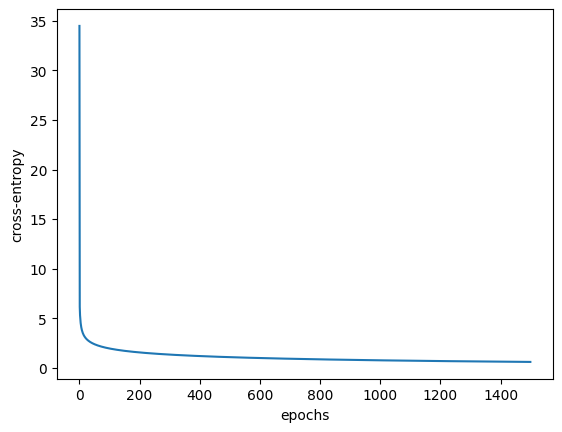

In [12]:
plt.figure(2)
plt.plot(range(num_epochs), loss_)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')

Text(0, 0.5, 'classification error')

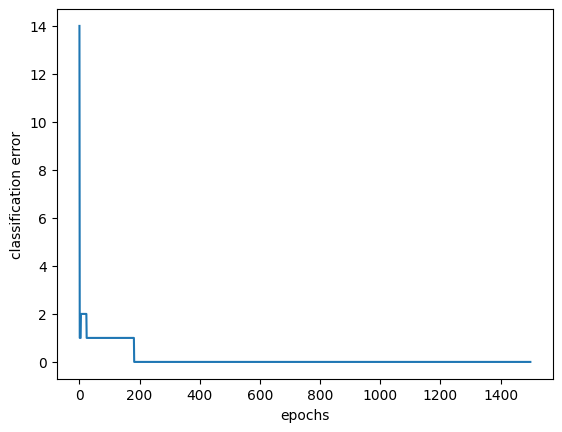

In [13]:
plt.figure(3)
plt.plot(range(num_epochs), err_)
plt.xlabel('epochs')
plt.ylabel('classification error')

## Plot the decision boundaries

In [14]:
w_, b_ = model.w.numpy(), model.b.numpy()
ww, bb = np.zeros((3, 2)), np.zeros(3)
for i in range(3):
    ww[i, :] = w_[:, i] - w_[:, (i+1)%3]
    bb[i] = b_[i] - b_[(i+1)%3]

print('ww: {}'.format(ww))
print('bb: {}'.format(bb))

m = -ww[:,0]/ww[:,1]
c = -bb/ww[:,1]

print('m: {}'.format(m))
print('c: {}'.format(c))



def compute_line(x):
    y = np.zeros((3, x.shape[0]))
    for i in range(3):
        y[i] = m[i]*x + c[i]

    return y

xx = np.arange(-4.5, 4.5, 0.01)
yy = compute_line(xx)

ww: [[ 3.25341043  6.29142584]
 [-7.58644635  3.12958821]
 [ 4.33303592 -9.42101405]]
bb: [-13.62926376   3.78736765   9.84189611]
m: [-0.51711814  2.4241037   0.45993307]
c: [ 2.16632352 -1.21018083  1.04467481]


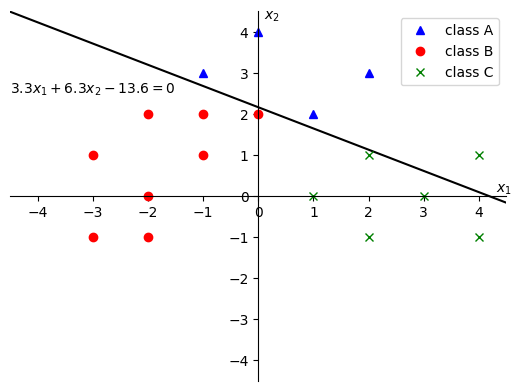

In [15]:
plt.figure(4)
l1 = plt.subplot(1, 1, 1)
l1.plot(xx, yy[0], color = 'black', linestyle = '-')
plot_pred = l1.plot(X[Y==0,0], X[Y==0,1], 'b^', label='class A')
plot_original = l1.plot(X[Y==1,0], X[Y==1,1], 'ro', label='class B')
plot_original = l1.plot(X[Y==2,0], X[Y==2,1], 'gx', label='class C')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim(-4.5, 4.5)
plt.xlim(xx.min(), xx.max())
plt.text(4.3, 0.1, r'$x_1$')
plt.text(0.1, 4.3, r'$x_2$')
plt.text(-4.5, 2.5, r'$3.3x_1+6.3x_2-13.6=0$')
plt.legend()

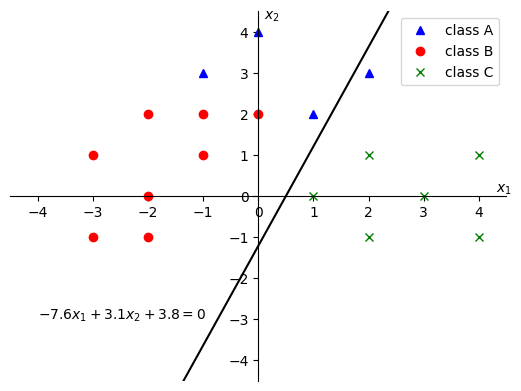

In [16]:
plt.figure(5)
l2 = plt.subplot(1, 1, 1)
l2.plot(xx, yy[1], color = 'black', linestyle = '-')
plot_pred = l2.plot(X[Y==0,0], X[Y==0,1], 'b^', label='class A')
plot_original = l2.plot(X[Y==1,0], X[Y==1,1], 'ro', label='class B')
plot_original = l2.plot(X[Y==2,0], X[Y==2,1], 'gx', label='class C')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim(-4.5, 4.5)
plt.xlim(xx.min(), xx.max())
plt.text(4.3, 0.1, r'$x_1$')
plt.text(0.1, 4.3, r'$x_2$')
plt.text(-4.0, -3.0, r'$-7.6x_1+3.1x_2+3.8=0$')
plt.legend()

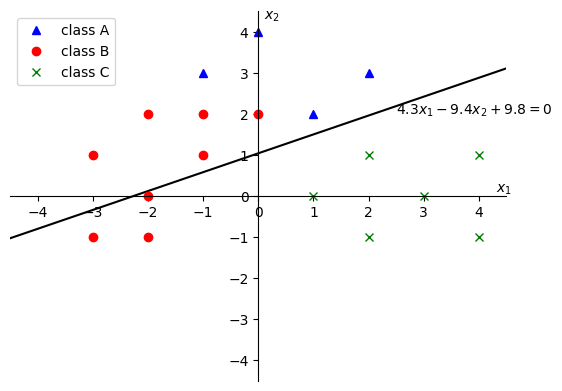

In [17]:
plt.figure(6)
l3 = plt.subplot(1, 1, 1)
l3.plot(xx, yy[2], color = 'black', linestyle = '-')
plot_pred = l3.plot(X[Y==0,0], X[Y==0,1], 'b^', label='class A')
plot_original = l3.plot(X[Y==1,0], X[Y==1,1], 'ro', label='class B')
plot_original = l3.plot(X[Y==2,0], X[Y==2,1], 'gx', label='class C')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim(-4.5, 4.5)
plt.xlim(xx.min(), xx.max())
plt.text(4.3, 0.1, r'$x_1$')
plt.text(0.1, 4.3, r'$x_2$')
plt.text(2.5, 2.0, r'$4.3x_1-9.4x_2+9.8=0$')
plt.legend()

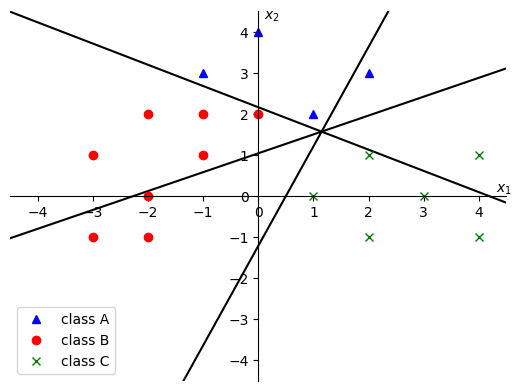

In [18]:
plt.figure(7)
line = plt.subplot(1, 1, 1)
line.plot(xx, yy[0], color = 'black', linestyle = '-')
line.plot(xx, yy[1], color = 'black', linestyle = '-')
line.plot(xx, yy[2], color = 'black', linestyle = '-')
plot_pred = line.plot(X[Y==0,0], X[Y==0,1], 'b^', label='class A')
plot_original = line.plot(X[Y==1,0], X[Y==1,1], 'ro', label='class B')
plot_original = line.plot(X[Y==2,0], X[Y==2,1], 'gx', label='class C')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim(-4.5, 4.5)
plt.xlim(xx.min(), xx.max())
plt.text(4.3, 0.1, r'$x_1$')
plt.text(0.1, 4.3, r'$x_2$')
plt.legend()

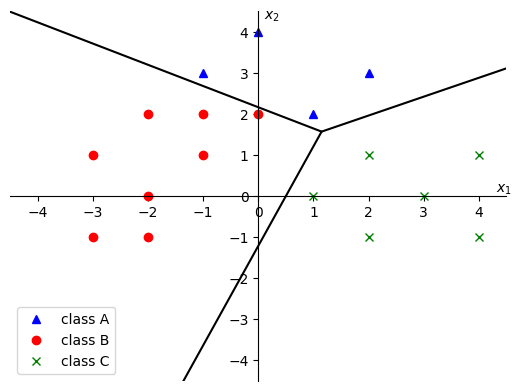

In [19]:
plt.figure(8)
line = plt.subplot(1, 1, 1)
line.plot(xx[yy[0] > yy[2]], yy[0, yy[0] > yy[2]], color = 'black', linestyle = '-')
line.plot(xx[yy[1] < yy[2]], yy[1, yy[1] < yy[2]], color = 'black', linestyle = '-')
line.plot(xx[yy[2] > yy[0]], yy[2, yy[2] > yy[0]], color = 'black', linestyle = '-')
plot_pred = line.plot(X[Y==0,0], X[Y==0,1], 'b^', label='class A')
plot_original = line.plot(X[Y==1,0], X[Y==1,1], 'ro', label='class B')
plot_original = line.plot(X[Y==2,0], X[Y==2,1], 'gx', label='class C')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim(-4.5, 4.5)
plt.xlim(xx.min(), xx.max())
plt.text(4.3, 0.1, r'$x_1$')
plt.text(0.1, 4.3, r'$x_2$')
plt.legend()